# Performance Assessment D208 - Logistical Regression

#### Ali Zaheer azaheer@wgu.edu

## Part I: Research Question
### A.  Describe the purpose of this data analysis by doing the following:
#### 1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using logistic regression.

Are the following predictors able to help identify which customer are at high risk of churn?
• Children
• Income
• Tenure
• MonthlyCharge
• Age
• Gender
• Marital

### 2.  Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

The stakeholders can review the data provided by the analysis and create incentives to keep the customers that are likely to terminate their contracts with the company. This will lead to a lower churn rate.

## Part II: Method Justification
### B.  Describe logistic regression methods by doing the following:
### 1.  Summarize the assumptions of a logistic regression model.

This analysis will be based on Bernoulli distribution to classify because the dependent variables are binary. There will be 'Yes' and 'No' restrictions placed on the predicted values. This will only predict the probability rather than the outcome. The algorithm will find the 'S-curve' and Maximum Likelihood Estimation to classify and estimate accuracy.


### 2.  Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

I will utilize Python due to my previous interaction with it and its Pandas, matplotlib and Scipy modules. Additionally, I will be using Jupyter notebook as the IDE because it provides a user-friendly experience. Pandas is an excellent package for working with data set as it makes it easy to load and manipulate columns and/or rows to replace null values. Matplotlib plot is an easy way to create graphs for identifying outliers using histograms and/or boxplots.

### 3.  Explain why logistic regression is an appropriate technique to analyze the research question summarized in Part I.

Logistic regression is a classification algorithm, it will predict customers and/or features are at high risk of churn?


## Part III: Data Preparation
### C.  Summarize the data preparation process for logistic regression by doing the following:
#### 1.  Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

    1. Sort the binary data by sucess (1) or failure (0)
    2. Calculate the logit for the data row
    3. Calculate the exponential of the logit Exp(L)
    4. Calculate the probabilty of the data row P(X)
    5. Calculate the Maximum log-likihood (MML)

#### 2.  Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

#### Summary Statistics

I will remove the following irrelevant columns from the DataFrame:

"CaseOrder", "Customer_id", "Interaction","Outage_sec_perweek", "UID", "City", "State",
"Techie","PaperlessBilling","Yearly_equip_failure","County", "Zip", "Lat", "Lng", "Population", 
"Area", "TimeZone", "Job", "Marital", "PaymentMethod","Bandwidth_GB_Year", "DeviceProtection",
"OnlineBackup","OnlineBackup","OnlineBackup", "OnlineBackup","Port_modem","OnlineSecurity", 
"Multiple","Phone","TechSupport","Contract","Tablet","InternetService", "StreamingTV", "StreamingMovies", 
"Timely_Response", "Timely_Fixes", "Timely_Replacements","Reliability","Options", "Respectful_Response","Courteous_Exchange","Evidence_of_active_listening","Email"

The average customer age is 53 years old with a standard deviation of 20 years. They have 2 children on average with a standard deviation of 2 kids. Their average income is 39,806 dollars with a standard deviation of 30,000, and they paid a monthly charge of approximately 173 dollars with 4 GBs/year.

##### Continous Predictor:

    • Children
    • Income
    • Tenure
    • MonthlyCharge
    • Age

##### Cateorical Predictor:
    • Gender
    • Marital

#### 3.  Explain the steps used to prepare the data for the analysis, including the annotated code.

    1. Import dataset to a DataFrame in Pandas.
    2. Review the summary statistics of DataFrame, structure & data types.
    3. Remove irrelavent columns from the DataFrame "Customer_id", "zip code".
    4. Review univariate & bivariate visualizations.
    5. provide a copy of the prepared dataset "prepared_dataset.csv" for use in KNN model

In [1]:
import pandas as pd
import jedi

# Visual libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Show all Columns and Rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data set
df = pd.read_csv('churn_clean.csv')

# Amend columns with no names
df = df.rename(columns=({ 'Item1': 'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 
                         'Item4':'Reliability', 'Item5':'Options', 'Item6':'Respectful_Response',
                         'Item7':'Courteous_Exchange', 'Item8':'Evidence_of_active_listening'}))

In [2]:
# Dropping columns that I think are not relavant to the analysis
churndf = df.drop(columns= ["CaseOrder", "Customer_id", "Interaction","Outage_sec_perweek", "UID", "City", "State", 
                            "Techie","PaperlessBilling","Yearly_equip_failure","County", "Zip", "Lat", "Lng", "Population", 
                            "Area", "TimeZone", "Job", "PaymentMethod","Bandwidth_GB_Year", "DeviceProtection",
                            "OnlineBackup","OnlineBackup","OnlineBackup", "OnlineBackup","Port_modem","OnlineSecurity", 
                            "Multiple","Phone","TechSupport","Contract","Tablet","InternetService", "StreamingTV", "StreamingMovies", 
                            "Timely_Response", "Timely_Fixes", "Timely_Replacements","Reliability","Options",
                            "Respectful_Response","Courteous_Exchange","Evidence_of_active_listening","Email", "Contacts"
                           ]) 

In [3]:
# display data set with all the columns
churndf.head(n=3)

,Children,Age,Income,Marital,Gender,Churn,Tenure,MonthlyCharge
0,0,68,28561.99,Widowed,Male,No,6.795513,172.455519
1,1,27,21704.77,Married,Female,Yes,1.156681,242.632554
2,4,50,9609.57,Widowed,Female,No,15.754144,159.947583


In [4]:
# count of rows and columns
churndf.shape

(10000, 8)

In [5]:
# Validate there are no nulls
churndf.isnull().sum()

Children         0
Age              0
Income           0
Marital          0
Gender           0
Churn            0
Tenure           0
MonthlyCharge    0
dtype: int64

In [6]:
# DataFrame statistics
churndf.describe()

,Children,Age,Income,Tenure,MonthlyCharge
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,34.526188,172.624816
std,2.1472,20.698882,28199.916702,26.443063,42.943094
min,0.0000,18.000000,348.670000,1.000259,79.978860
25%,0.0000,35.000000,19224.717500,7.917694,139.979239
50%,1.0000,53.000000,33170.605000,35.430507,167.484700
75%,3.0000,71.000000,53246.170000,61.479795,200.734725
max,10.0000,89.000000,258900.700000,71.999280,290.160419


#### 4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

#### Univariate Statistics

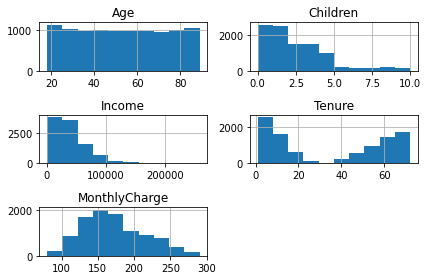

In [7]:
churndf[['Age','Children','Income','Tenure','MonthlyCharge']].hist()
plt.tight_layout()

#### Bivariate Statistics

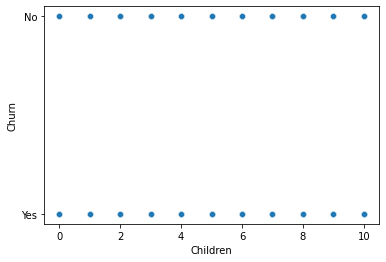

In [8]:
# bivariate
sns.scatterplot(x=churndf['Children'], y=churndf['Churn'])
plt.show()

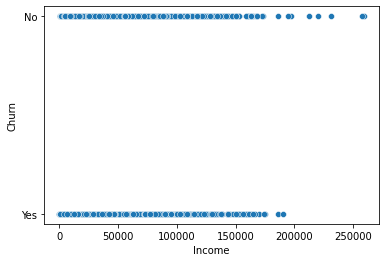

In [9]:
sns.scatterplot(x=churndf['Income'], y=churndf['Churn'])
plt.show()

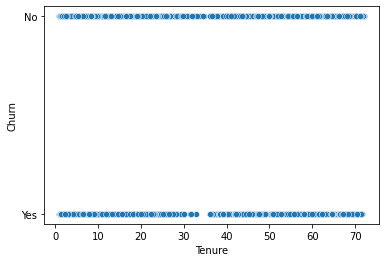

In [10]:
sns.scatterplot(x=churndf['Tenure'], y=churndf['Churn'])
plt.show()

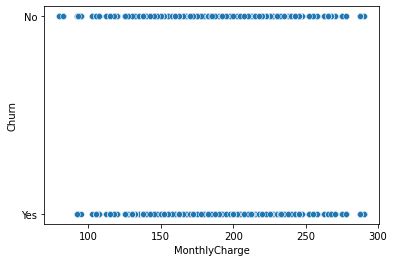

In [11]:
sns.scatterplot(x=churndf['MonthlyCharge'], y=churndf['Churn'])
plt.show()

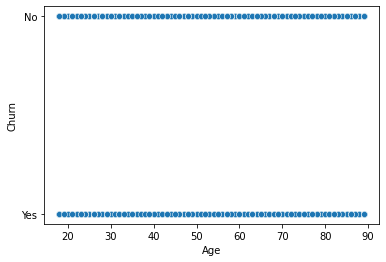

In [12]:
sns.scatterplot(x=churndf['Age'], y=churndf['Churn'])
plt.show()

Scatterplot Summary: I was not able to find any correlation between the dataset and Churn

In [13]:
# How does the data stack up in terms of Churn
churndf['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

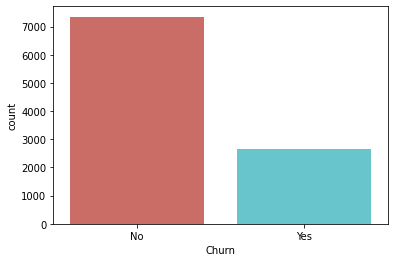

In [14]:
# Count plot visualizes how the data stack up in terms of Churn
sns.countplot(x='Churn', data=churndf, palette='hls')
plt.show()

#### 5.  Provide a copy of the prepared data set.

In [15]:
# Prepared dataset in the root folder 'prepared_dataset.csv'
churndf.to_csv('prepared_dataset.csv')

## Part IV: Model Comparison and Analysis
### D.  Compare an initial and a reduced logistic regression model by doing the following:
#### 1.  Construct an initial logistic regression model from all predictors that were identified in Part C2

In [16]:
import statsmodels.api as sm
from sklearn import preprocessing

# Initial model
Initial_model = churndf.copy()

# Convert categorical data to binary
Initial_model['Churn'] = [1 if v == 'Yes' else 0 for v in Initial_model['Churn']]
Initial_model['Gender'] = [1 if v == 'Male' else 0 for v in Initial_model['Gender']]
Initial_model['Marital'] = [1 if v == 'Married' else 0 for v in Initial_model['Marital']]
Initial_model['intercept'] =1
# Create initial model with logit
Initial_model_logit_model = sm.Logit(Initial_model['Churn'], Initial_model[['Children','Age','Income', 'Tenure','MonthlyCharge','intercept','Gender','Marital']]).fit()
Initial_model_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.341585
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Wed, 29 Dec 2021   Pseudo R-squ.:                  0.4092
Time:                        12:32:47   Log-Likelihood:                -3415.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Children         -0.0089      0.014     -0.624      0.533      -0.037       0.019
Age               0.0016      0.001      1.083      0.279      -0.001       0.004
Income         8.527e-07   1.08e-06      0.791      0.429   -1.26e-06    2.97e-06
Tenure           -0.0739      0.002    -41.791      0.000      -0.077      -0.070
MonthlyCharge     0.0332      0.001     37.105      0.000       0.031       0.035
intercept        -5.3337      0.181    -29.454      0.000      -5.689      -4.979
Gender            0.1708      0.061      2.817      0.005       0.052       0.290
Marital          -0.0107      0.078     -0.137      0.891      -0.163       0.142
=================================================================================
"""

#### 2.  Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

In [17]:
from sklearn.tree import DecisionTreeClassifier
churndf['Churn'] = [1 if v == 'Yes' else 0 for v in churndf['Churn']]
churndf['Gender'] = [1 if v == 'Male' else 0 for v in churndf['Gender']]
churndf['intercept'] =1
churndf = pd.get_dummies(churndf)

In [18]:
# Feature Selection
X = churndf.drop('Churn', axis=1).values
y = churndf['Churn']

In [19]:
# Which feature have the most impact on the model
dt  = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [20]:
# I will be using the 'feature_importances_' 
# from the 'DecisionTreeClassifier' to identify which feature have the most impact

fi_col = []
fi = []
for k, v in enumerate(churndf.drop('Churn', axis=1)):
    #print('{} is {}'.format(v, dt.feature_importances_[k]))
    fi_col.append(v)
    fi.append(dt.feature_importances_[k])
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns=['Feature', 'Feature Importance'])
fi_df.sort_values('Feature Importance', ascending= False).reset_index()

,index,Feature,Feature Importance
0,4,Tenure,0.486569
1,5,MonthlyCharge,0.365573
2,2,Income,0.057896
3,1,Age,0.045103
4,0,Children,0.014164
5,3,Gender,0.008041
6,7,Marital_Divorced,0.005944
7,10,Marital_Separated,0.004891
8,9,Marital_Never Married,0.004796
9,8,Marital_Married,0.004620


I will use the 'Tenure' and 'MonthlyCharge' as they seem to have the most impact (and are statistically significant) on the churn based on their 'Feature Importance'.

## E.  Analyze the data set using your reduced logistic regression model by doing the following:
#### 1.  Explain your data analysis process by comparing the initial and reduced logistic regression models, including the following elements:
     •  The logic of the variable selection technique
     •  The model evaluation metric

In [21]:
churndf_logit_reduced_model = sm.Logit(churndf['Churn'], churndf[['Tenure','MonthlyCharge','intercept']]).fit()
churndf_logit_reduced_model.summary()

Optimization terminated successfully.
         Current function value: 0.342087
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 Dec 2021   Pseudo R-squ.:                  0.4084
Time:                        12:32:48   Log-Likelihood:                -3420.9
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Tenure           -0.0738      0.002    -41.788      0.000      -0.077      -0.070
MonthlyCharge     0.0332      0.001     37.119      0.000       0.031       0.035
intercept        -5.1525      0.150    -34.283      0.000      -5.447      -4.858
=================================================================================
"""

Pseudo R-squared went down by .008 points after removing features from the initial model. This means the omitted column did not have much effect on the model. The reduced model also points to 40% of the variance when compared to the initial model.

Reduced Linear Regression Model: churn = -5.1525 + (-0.0738 *  Tenure) + (0.0332 * MonthlyCharge)

In [22]:
print('Initial Model AIC: {} compared to Reduced Model {}'.format(Initial_model_logit_model.aic,churndf_logit_reduced_model.aic))
print('This proves that the Reduced model is a better fit for the data as the AIC is higher.')

Initial Model AIC: 6847.702731665484 compared to Reduced Model 6847.73415590327
This proves that the Reduced model is a better fit for the data as the AIC is higher.


#### 2.  Provide the output and any calculations of the analysis you performed, including a confusion matrix.
    Note: The output should include the predictions from the refined model you used to perform the analysis. 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
# Train the model
x_train, X_test, y_train, Y_test = train_test_split(X,y, test_size=.02, random_state=0)
classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [25]:
# Prediction
y_pred = classifier.predict(X_test)

In [26]:
# Implementing confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)

[[128  20]
 [ 17  35]]


<AxesSubplot:>

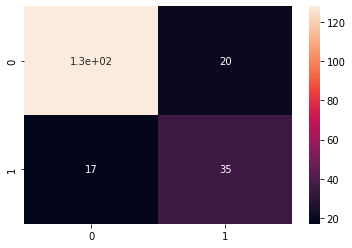

In [27]:
# Heatmap of the Y_test and Y_pred
y_predict_test = classifier.predict(X_test)
n_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(n_matrix, annot=True)

In [28]:
# Classification report of the precision
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       148
           1       0.64      0.67      0.65        52

    accuracy                           0.81       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.82      0.81      0.82       200



#### 3.  Provide the code used to support the implementation of the logistic regression models.

The code is available above.

## Part V: Data Summary and Implications
### F.  Summarize your findings and assumptions by doing the following:
#### 1.  Discuss the results of your data analysis, including the following elements:

Regression equation for the reduced model is Churn = -5.1525 + (-0.0738 * tenure) + (0.0332 * MonthlyCharge)
 
There is an inverse relationship between the Churn and selected predictors. Following predictors 'Age', 'Children' and 'Income' were removed as they do not have much impact on the decision-making process. The model predicts that each one unit change of:
    - Tenure will decrease Churn by  -0.0738
    - MonthlyCharge will increase Churn by 0.0332

To the company it means, they need to focus on the needs of the new joiners as they have a higher tendency to churn.

P-values for Tenure and MonthlyCharge are statistically significant at '0.000' which mean they will have an impact on the Churn rate.

Limitations: The data is limited to 10,000 rows and having a bigger dataset would provide a deep understanding.

#### 2.  Recommend a course of action based on your results:

The above analysis informs the company that customers with less tenure (i.e., month-to-month contract) and high cost tend to have a high churn. The stakeholders need to further invest in market analysis to identify what is a competitive price for services and the marketing team needs to come up with products and services that will create an eco-system for the customer which will decrease the Churn rate.

### Part VI: Demonstration
#### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.

```{bibliography}
Pandas. (2021). Pandas DataFrames. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Get started with references. (2021). Jupyterbook. https://jupyterbook.org/tutorials/references.html#tutorials-references

Marques, A. M. (2020, March 11). How to show all columns / rows of a Pandas Dataframe? Towards Data Science. https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

Starmer, J. (2018, March 5). StatQuest: Logistic Regression. YouTube. https://www.youtube.com/watch?v=yIYKR4sgzI8&t=121s

V. (2019, July 21). Pandas: Apply a function to single or selected columns or rows in Dataframe. ThisPointer. https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/

Wijaya, C. Y. (2021, December 15). 5 Must-Know Dimensionality Reduction Techniques via Prince. Medium. https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1
```

#### I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

```{bibliography}
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.
```

Panapto: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9b03a655-c301-414f-b1c3-ae0d00ce9f9b